# Центральная предельная теорема своими руками

Итак, я решила в качестве непрерывного распределения взять равномерное распределение на отрезке, к примеру время ожидания очереди у врача (по записи) может быть от 2 до 15 минут 

## 1 шаг: выборка из 1000 элементов


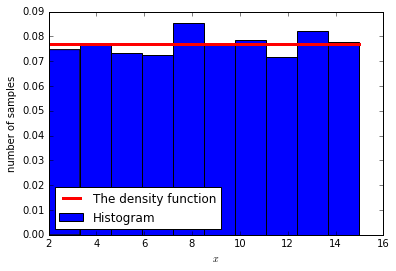

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import pylab

#формируем выборку непрерывного распределения
a=2
b=15
rv1 = sts.uniform(a, b-a)
rv2= rv1.rvs(1000)

#строим гистограмму
plt.hist(rv2, normed=True,  label="Histogram")
plt.ylabel('number of samples')
plt.xlabel('$x$')

#строим функцию плотности
x = np.linspace(a,b,1000)
pdf = rv1.pdf(x)
plt.plot(x, pdf, color="red", linewidth=3, label="The density function")
plt.legend(loc='lower left')



## Шаг 2 : Cоздаем выборки разного объема, ищем выборочные средние, подбираем параметры нормального распределения

In [21]:
m=[0]*1000
# создадим функцию для отыскания выборочных средних 1000 выборок по x значений в каждой
def f(x,y):
    for j in range(1000):
        f=sts.uniform(a, b-a)
        f= f.rvs(x)
        y[j]= np.sum(f)/(x)
    return y

### Подсчет теоретического среднего значения и дисперсии изначального распределения

Среднее значение для нашей функции ищется крайне просто:
$$l = (a+b)/2 = M(X) $$

Дисперсию ищем так : 
$$ D(x)= integrate(f(x)*(x-M(x))^2)dx $$ 
или же(для равномерного распределения на отрезке): $$D(x)=(b-a)^2/12$$

Согласно Централной предельной теореме распределение выборочных средних ~ нормальному распределению с параметрами l и D/n.
Построим это нормальное распределение и проверим.


In [22]:
l=(a+b)/2.0
D=(b-a)**2/12.0

#Чтобы каждый раз не делить дисперсию на n и не брать квадрат (для нахождения среднего квадратичного отклоненя) 
def g(d,n):
    return np.sqrt(d/n)


## Шаг 3: Теперь самое приятное: рисуем графики получившихся распределений

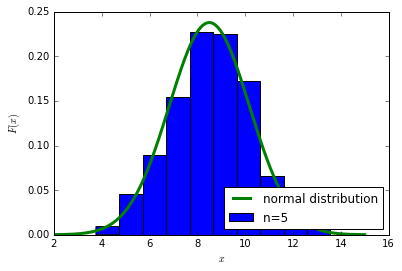

In [23]:
#Нарисуем гистограммы распределений  выборочных средних выборок по 5,10 и 50 значений

plt.hist(f(5,m), normed=True, bins= 10,  label="n=5 ")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#График нормального распределения :
norm_rv = sts.norm(l, g(D,5))
pdf2 = norm_rv.pdf(x)
plt.plot(x, pdf2, label= "normal distribution", color="green", linewidth=3)

plt.legend(loc='lower right')


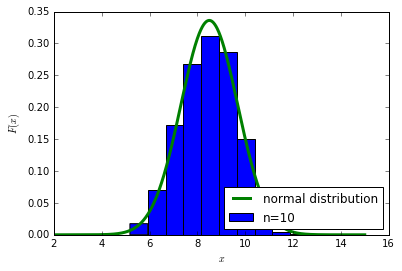

In [24]:
plt.hist(f(10,m), normed=True, bins= 10, label="n=10")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

##График нормального распределения :
norm_rv = sts.norm(l, g(D,10))
pdf2 = norm_rv.pdf(x)
plt.plot(x, pdf2, label= "normal distribution", color="green", linewidth=3)

plt.legend(loc='lower right')


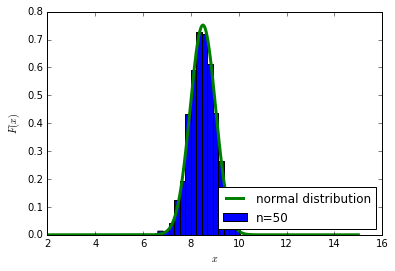

In [25]:
plt.hist(f(50,m), normed=True, bins= 15, label="n=50")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

##График нормального распределения :
norm_rv = sts.norm(l, g(D,50))
pdf2 = norm_rv.pdf(x)
plt.plot(x, pdf2, label= "normal distribution", color="green", linewidth=3)

plt.legend(loc='lower right')



# Вывод

Итак, по результатам эксперимента, можно смело утверждать, что ЦПТ действительно работает. 

Как видно в начале работы, изначальное распределение ничего общего с нормальным не имело, функция плотности описывалась простой горизонтаьной линией (даже с натяжкой шляпой это не назовешь:D)

Решено было проверить: а что если построить гистограммы выборочных средних?
Построенные гистограммы дейстительно стали напоминать  нормальное распределение, но сходство надо еще доказать!
Пользуясь центральной предельной теоремой, я попробовала приблизить наши распределения нормальным, и теория действительно подтвердилась: чем больше данных в наших выборках, тем более точно теоретическое нормальное распределение описывает наше.

Так, на собственном опыте, я убедилась во всем могуществе ЦПТ!